Para este problema suponemos que la variable dependiente customer ==1 quiere decir que se ha suscrito o a realizado alguna acción en la página a la app viendo que hay una columna sobre el sistema operativo.

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [91]:
datos = pd.read_csv('train_data.csv.csv_fixed')

In [92]:
datos.head()

,user_id,channel,age,os,gender,country,customer
0,100000,00 Organic,20,ios,female,GB,0
1,100001,00 Organic,30,ios,female,US,1
2,100002,31 OUTBRAIN,35,ios,female,DE,0
3,100003,00 Organic,26,android,female,US,0
4,100004,32 Taboola,55,ios,female,US,1


In [93]:
#Como simepre comprobar si hay valores NaN
datos.isnull().sum()

user_id     0
channel     0
age         0
os          0
gender      0
country     0
customer    0
dtype: int64

In [94]:
#los datos estan limpios ahora vamos a comprobar vienod un poco los datos
datos.describe()

,user_id,age,customer
count,82908.000000,82908.000000,82908.000000
mean,141453.500000,31.151734,0.297848
std,23933.622396,11.596902,0.457315
min,100000.000000,12.000000,0.000000
25%,120726.750000,22.000000,0.000000
50%,141453.500000,29.000000,0.000000
75%,162180.250000,38.000000,1.000000
max,182907.000000,96.000000,1.000000


In [95]:
#como conclusiones= la media de esdad esta en 30 años no paree que hay  
#outlier podemos asumir que la edad de 96 años es creible.
#vemos tambien que hay un 30% de datos como customers.

In [96]:
#EDA
#ver cuantos usuario son de españa
datos[datos['country']=='ES'] ['country'].count()

4172

In [97]:
#De donde son la mayoria de la gente
datos['country'].value_counts().head(2)


US    50855
GB     9226
Name: country, dtype: int64

In [98]:
#ver la diferencia entre hombres y mujeres 
datos['gender'].value_counts()

female    57031
male      25877
Name: gender, dtype: int64

In [99]:
#hay mas hombre que mujeres 

In [100]:
#ver que sistema operativo es el mas utilizado
datos['os'].value_counts()

ios        48662
android    34246
Name: os, dtype: int64

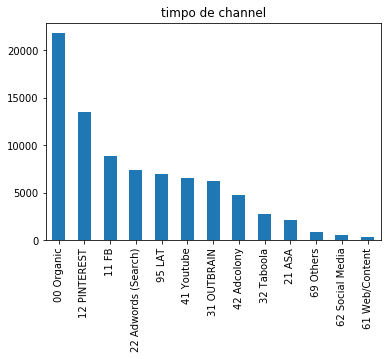

In [101]:
#vamos a realziar algunos graficos 
#figura = plt.figure(figsize=(20,20))
chan = datos['channel'].value_counts()
chan.plot(kind='bar', title='timpo de channel')
plt.show()

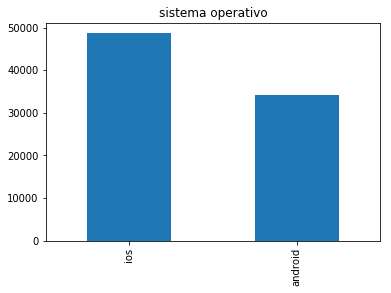

In [102]:
#vamos a ver otro grafico por ejemplo tipo de sistema operativo utilizado

sist = datos['os'].value_counts()
sist.plot(kind='bar',title='sistema operativo')
plt.show()

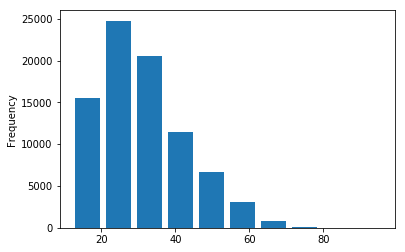

In [103]:
#para sacar una conlusion vamo ahora ver otra grafica de los años
anios = datos['age']
anios.plot.hist(rwidth = 0.8, zorder = 5)
plt.show()

In [104]:
#conclusiones : vemos que la mayoria de la personas poseen un dispositivo apple
#y vienene de facebook ,organic y pinterest.La edad media como vemos esta 
#esta entre 20-40.

In [105]:
#ver probabilida de coversion con el tipo de canal
conve_cha = pd.crosstab(datos['channel'],datos['customer'])
conve_cha


customer,0,1
channel,,
00 Organic,15218,6577
11 FB,6646,2211
12 PINTEREST,9535,4029
21 ASA,1521,587
22 Adwords (Search),5693,1678
31 OUTBRAIN,3577,2660
32 Taboola,1515,1274
41 Youtube,5042,1480
42 Adcolony,3511,1295


In [106]:
#para calcular la probabilidad se realiza de la siguinte forma : division(tanto de la columna 0 como la del 1)/suma de los valores de la columna en la misma fila.
conve_cha.div(conve_cha.sum(axis =1),axis=0)

customer,0,1
channel,,
00 Organic,0.698234,0.301766
11 FB,0.750367,0.249633
12 PINTEREST,0.702964,0.297036
21 ASA,0.721537,0.278463
22 Adwords (Search),0.772351,0.227649
31 OUTBRAIN,0.573513,0.426487
32 Taboola,0.543205,0.456795
41 Youtube,0.773076,0.226924
42 Adcolony,0.730545,0.269455


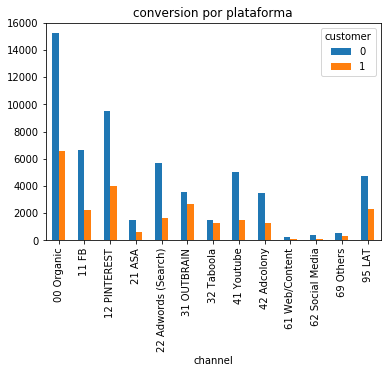

In [107]:
#hacemos una grafica para representar esta tabla.
conve_cha.plot(kind='bar',title='conversion por plataforma')
plt.show()

In [108]:
#vamos hacer lo mismo pero viendo la probabilidad con con el tipo de sistema operativo
conv_os = pd.crosstab(datos['os'],datos['customer'])

In [109]:
#determinar la probabilidad 
conv_os.div(conv_os.sum(axis = 1),axis=0)

customer,0,1
os,,
android,0.724464,0.275536
ios,0.686449,0.313551


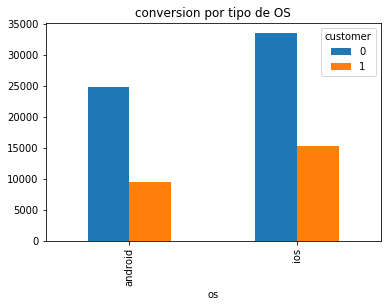

In [110]:
conv_os.plot(kind='bar',title='conversion por tipo de OS')
plt.show()

# preprocesamiento

In [111]:
#vemos las columnas necesarias  y las que no son
datos = datos.drop('user_id',axis = 1)

In [112]:
datos.head()

,channel,age,os,gender,country,customer
0,00 Organic,20,ios,female,GB,0
1,00 Organic,30,ios,female,US,1
2,31 OUTBRAIN,35,ios,female,DE,0
3,00 Organic,26,android,female,US,0
4,32 Taboola,55,ios,female,US,1


In [113]:
# es neceario aplicarle el get_dummy a las variables categoricas 
def dummy(datos):
    for i in datos.columns:
        if datos[i].dtype =='O':
            datos = pd.concat([datos,pd.get_dummies(datos[i],prefix=i)],axis = 1)
            del datos[i]
    return datos

In [114]:
dum = dummy(datos)

In [115]:
X = dum.drop('customer',axis=1)
X.head()
X.columns

Index([u'age', u'channel_00 Organic', u'channel_11 FB',
       u'channel_12 PINTEREST', u'channel_21 ASA',
       u'channel_22 Adwords (Search)', u'channel_31 OUTBRAIN',
       u'channel_32 Taboola', u'channel_41 Youtube', u'channel_42 Adcolony',
       u'channel_61 Web/Content', u'channel_62 Social Media',
       u'channel_69 Others', u'channel_95 LAT', u'os_android', u'os_ios',
       u'gender_female', u'gender_male', u'country_AU', u'country_CA',
       u'country_DE', u'country_ES', u'country_FR', u'country_GB',
       u'country_MX', u'country_US'],
      dtype='object')

In [116]:
 y = dum['customer']

In [117]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: customer, dtype: int64

In [118]:
#una vez que hemos separado en dos variables por un lado la x con todas la features independientes 
#luego tenemos la y con la variable dependiente.
from sklearn.cross_validation import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [120]:
X_train.shape[0]

66326

In [121]:
X_test.shape[0]

16582

In [122]:
y_train.shape[0]

66326

In [123]:
#vemos como ha realizado la division 
y_train.head()

31557    0
35318    0
20374    0
6710     0
333      0
Name: customer, dtype: int64

In [124]:
#vamos a realizar una logistic regression
#vamos por partes:-realizamos un scale de los X tanto train como test
#utilizamos la metrica de accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [125]:
vari = [('scalar', StandardScaler()),('logit_reg',LogisticRegression())]

In [126]:
log = Pipeline(vari)

In [127]:
#hacer el scaling de los datos X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit del modelo 
from sklearn.linear_model import LogisticRegression
classi = LogisticRegression(random_state = 0)
classi.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
# Predicting the Test set results
y_pred = classi.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [129]:
bonito = pd.DataFrame(confusion_matrix(y_test,y_pred))
bonito

,0,1
0,11308,321
1,4504,449


In [130]:
(y_pred==y_test).mean()

0.70902183090097692

In [131]:
#este proyecto tenia tanto un train dataset como un test data set
#para comprobar realizar nuevas predicciones vamos a utilizar el test data set para hacer predicciones.

datos_test = pd.read_csv('test_data.csv.csv_fixed')


In [132]:
datos_test.head()

,user_id,channel,age,os,gender,country
0,0,42 Adcolony,32,android,female,US
1,1,12 PINTEREST,27,android,female,US
2,2,00 Organic,36,ios,male,GB
3,3,42 Adcolony,29,ios,female,US
4,4,12 PINTEREST,20,ios,female,CA


In [133]:
#vemos como es un test data ya que no tenemos la varable dependiente. 

In [134]:
#como tambien hay variables categoricas vamos a llamar a la funcion realizada anteriormente 
data_final_test = dummy(datos_test)
data_final_test.head()

,user_id,age,channel_00 Organic,channel_11 FB,channel_12 PINTEREST,channel_21 ASA,channel_22 Adwords (Search),channel_31 OUTBRAIN,channel_32 Taboola,channel_41 Youtube,...,gender_female,gender_male,country_AU,country_CA,country_DE,country_ES,country_FR,country_GB,country_MX,country_US
0,0,32,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,27,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2,36,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3,29,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,4,20,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [135]:
data_final_test.columns

Index([u'user_id', u'age', u'channel_00 Organic', u'channel_11 FB',
       u'channel_12 PINTEREST', u'channel_21 ASA',
       u'channel_22 Adwords (Search)', u'channel_31 OUTBRAIN',
       u'channel_32 Taboola', u'channel_41 Youtube', u'channel_42 Adcolony',
       u'channel_61 Web/Content', u'channel_62 Social Media',
       u'channel_69 Others', u'channel_95 LAT', u'os_android', u'os_ios',
       u'gender_female', u'gender_male', u'country_AU', u'country_CA',
       u'country_DE', u'country_ES', u'country_FR', u'country_GB',
       u'country_MX', u'country_US'],
      dtype='object')

In [136]:
#parece que la columna de id sobre ya que no se utilizo anteriormente. Haremos un drop a esa columna
data_final_test=data_final_test.drop('user_id',axis=1)

In [144]:
con_pred = classi.predict(data_final_test)

In [143]:
#no funciona del todo puede ser por el scaling que le hacemos y aqui no se hace vemos. Se estudiara mas adelante.